The first part of the code initializes the database that you will need for the last part of the assignment. It also adds some libraries to help with handling your code. If you wish to use more libraries you can add them here. When prompted, you will get a request to allow Google SDK access your google account. Follow the link and accept with your university google account. Copy the verification link. You should see a plot of the PES of H2 if everything was successful.

In [ ]:
%pip install netCDF4 
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import math

# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# link = 'https://drive.google.com/file/d/1AX7p4iDbbXSV9af5kXw9szzoDJ13IRcF/view?usp=sharing'
# id ='1AX7p4iDbbXSV9af5kXw9szzoDJ13IRcF'
# downloaded = drive.CreateFile({'id':id})
# downloaded.GetContentFile('testdata.nc') 
# testdata = 'testdata.nc' 
# ds = nc.Dataset(testdata)

# for var in ds.variables.values():
#     print(var)

# yAxis = []
# xAxis = np.arange(0.25,5.05,0.05)
# for i in range(96):
#   yAxis.append(ds['energy'][i][0:])
  
# plt.ylabel("Ev")
# plt.xlabel("Bond Distance")
# plt.plot(xAxis,yAxis)
# plt.savefig('test_data.png')

In [ ]:
### activation function
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def der_sigmoid(x):
    return x * (1.0 - x)

### neural network

class NeuralNetwork:
    def __init__(self, x, y, nodes):
        self.input = x
        self.output = y
        self.node = nodes
        self.weights1 = np.random.rand(self.input.shape[1],self.node)
        self.weights2 = np.random.rand(self.node,self.output.shape[1])
        self.output_predict = np.zeros(y.shape)
    
    def forward_feed(self):
        self.hidden_layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output_predict = sigmoid(np.dot(self.hidden_layer1, self.weights2))

    def backward_propogation(self):
        self.error = self.output -self.output_predict
        self.square_error = np.square(self.error)
        d_weights2 = np.dot(self.hidden_layer1.T, 2 * self.error * der_sigmoid(self.output_predict))
        d_weights1 = np.dot(self.input.T, np.dot(2 * self.error * der_sigmoid(self.output_predict), self.weights2.T)* der_sigmoid(self.hidden_layer1))
        # update the weights
        self.weights1 += d_weights1
        self.weights2 += d_weights2



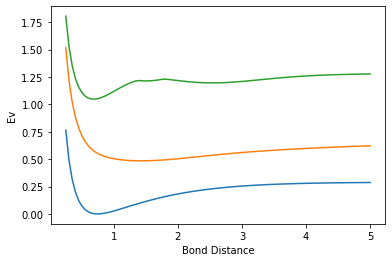

In [ ]:
fn = '/content/testdata.nc'
ds = nc.Dataset(fn)

yAxis = []
xAxis = np.arange(0.25,5.05,0.05)
for i in range(96):
  yAxis.append(ds['energy'][i][0:])
  
yAxisMin= np.amin(yAxis)
yAxis = yAxis-yAxisMin
plt.ylabel("Ev")
plt.xlabel("Bond Distance")
plt.plot(xAxis,yAxis)
#plt.savefig('test_data.png')

input_array = np.reshape(xAxis, (-1, 1))
output_array = yAxis

In [ ]:
### normalize the input data and output data
input_scaler = input_array.max()
input_norm = input_array/input_array.max()
output_scaler = output_array[:,0].max()
#print(output_scaler)
output_norm = output_array[:,0]/output_scaler
output_norm = np.array(list(output_norm)).reshape(96,1)
#print(output_norm)


The following code checks if the database data is working and creates an input and output array based on this data. 


# layer 1, epchos 10000, nodes 4

In [ ]:
nn=NeuralNetwork(input_norm,output_norm,12)
mse=[]
for i in range(10000):
    nn.forward_feed()
    nn.backward_propogation()
    mse.append(nn.square_error.mean())

rmse = [math.sqrt(i) for i in mse]
print(rmse)
print(np.array(rmse).min())
# print(nn.output_predict)

[0.724012095899249, 0.30473586142678255, 0.29424374048182367, 0.15159610244001484, 0.16410589846651005, 0.7383539356512896, 0.7170083698129979, 0.30800886348776974, 0.3071614861307016, 0.3054089447240149, 0.3005052908003169, 0.2741124250022776, 0.4528310098652934, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194717, 0.3100503091194

(10000,)


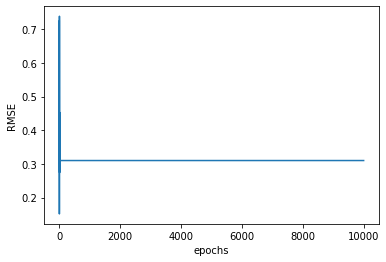

In [ ]:
### PLOT RMSE VS epochs

# plt.figure(figsize=(6,4.5),dpi=120)
epochs = np.linspace(0,10000,10000)
print(epochs.shape)
plt.plot(epochs, rmse)
# plt.axhline(y=0.001, color='r', linestyle='-')
# plt.axhline(0.01, color = 'g', linestyle = '-')
plt.xlabel('epochs')
plt.ylabel("RMSE")
# plt.ylim(0,0.15)
#plt.savefig("RMES_epochs_training_set.png",dpi=120)
plt.show()

In [ ]:
rmse_min_node4 = math.sqrt(min(mse))
rmse_min_node4

0.27485635842044576

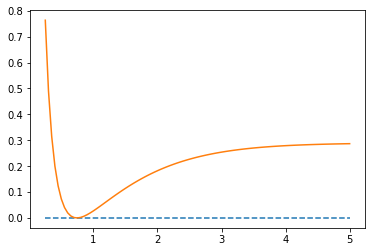

In [ ]:
output_predict_node4 = nn.output_predict * output_scaler
# print(output_predict_test2)

plt.plot(input_array, output_predict_node4, '--')
plt.plot(input_array,output_array[:,0],'-')
#plt.savefig("fit_vs_experiments.png",dpi=120)
plt.show()

# layer 1, epochs 10000, nodes 8